In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import random





In [5]:
dataset = pd.read_csv("headbrain.csv")
dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [6]:
#dividing the data into training and testing data
x = dataset["Head Size(cm^3)"].values
y = dataset["Brain Weight(grams)"].values
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3,random_state = 2)

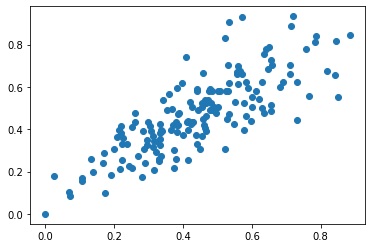

In [7]:
plt.plot(x_train, y_train, 'o')
plt.show()

In [8]:
iter = 50000
m = 0
c = 0
alpha = 0.01
n = len(x_train)
n

165

In [9]:
for i in range(iter):
    Y_pred = m * x_train + c
    dm = (-1 / n) * np.sum(x_train.dot(y_train - Y_pred))
    dc = (-1 / n) * np.sum(y_train - Y_pred)  
    m = m - alpha * dm  
    c = c - alpha * dc  
    Y_pred = m * x_train + c
#     print(Y_pred)

print(m,c)

0.8111569516544761 0.11225569067227745


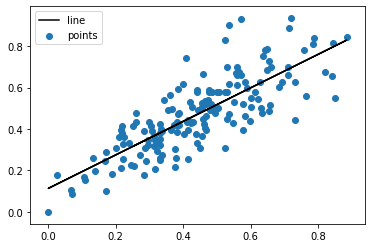

In [10]:
plt.plot(x_train,Y_pred,label = "line",color = "black")
plt.scatter(x_train,y_train,label = "points")
plt.legend()

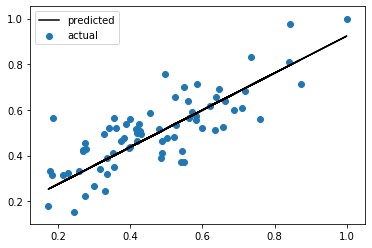

In [11]:
h_theta = x_test * m + c
plt.plot(x_test,h_theta,label = "predicted",color = "black")
plt.scatter(x_test,y_test,label = "actual")
plt.legend()
plt.show()

In [12]:
n = len(x_test)
rmse = np.sqrt((np.sum(y_test - h_theta) ** 2) / n)
rss = np.sum((y_test - h_theta) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
rs = 1 - (rss / tss)
print("Testing Accuracy : \n","RSS :",rss,"\nRMSE: ",rmse)

Testing Accuracy : 
 RSS : 0.7230751154178707 
RMSE:  0.11601111869323638
